<a href="https://colab.research.google.com/github/Elanchezhiyan01/SCT_DS_03/blob/main/decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
Accuracy: 0.7948947604120018
              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1166
        True       0.78      0.80      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



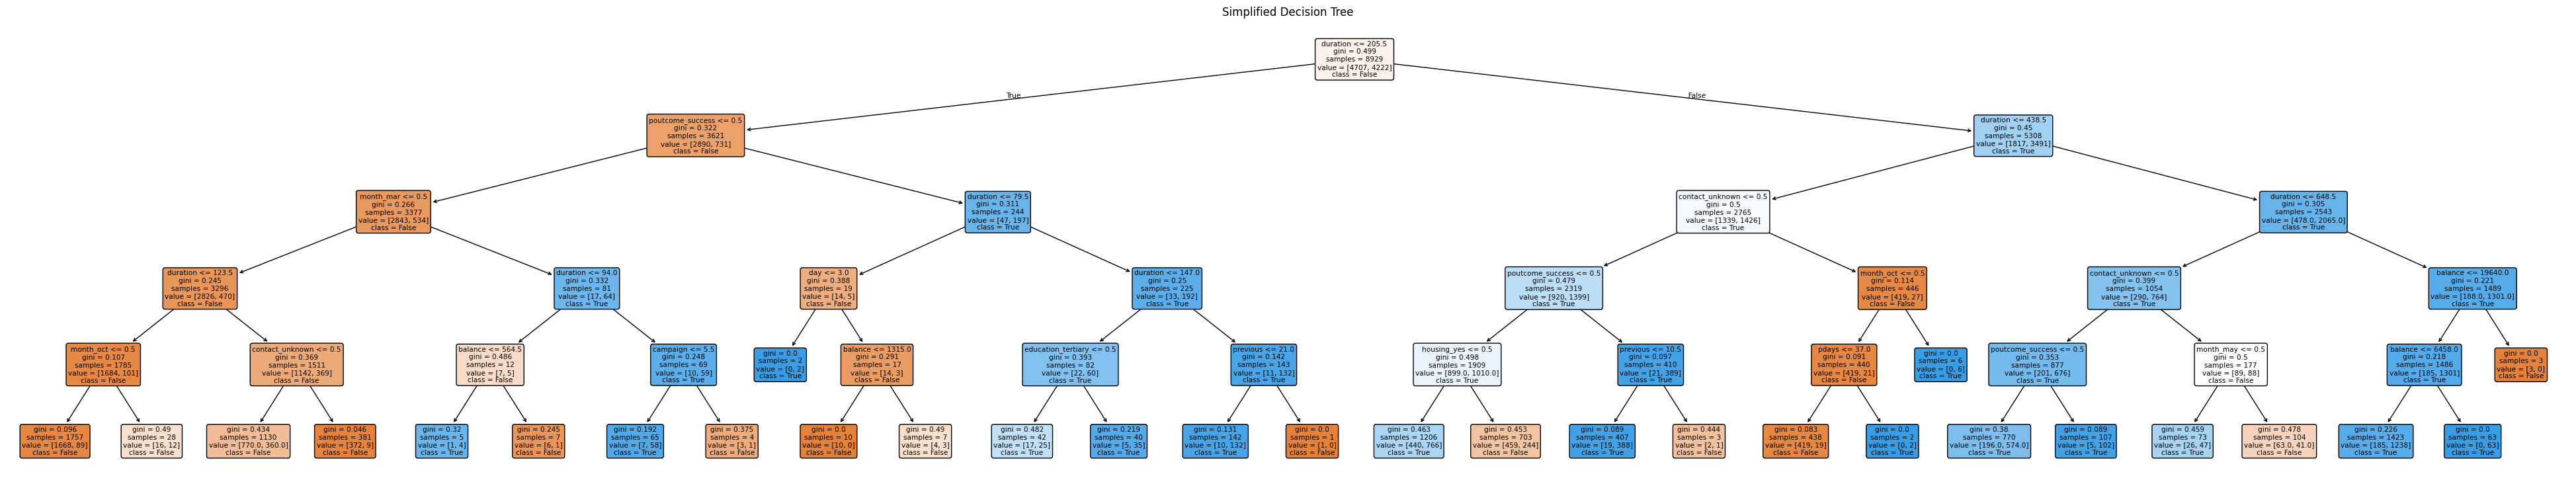

      age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
5527   65      744    5       182         1     -1         0            False   
4541   38     1627   16      1323         9     -1         0             True   
1964   35     4963   14       456         1    300         1             True   
5007   47     8229    8       784         2     -1         0             True   
8928   35     1473   12        84         3     -1         0            False   

      job_entrepreneur  job_housemaid  ...  month_mar  month_may  month_nov  \
5527             False          False  ...      False      False      False   
4541             False          False  ...      False      False      False   
1964             False          False  ...      False       True      False   
5007             False          False  ...      False      False      False   
8928             False          False  ...      False       True      False   

      month_oct  month_sep  poutcome_o

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Excel dataset
df = pd.read_excel("/content/bank..xlsx")  # Update path if needed

# Optional: View column names to confirm target
print("Columns:", df.columns)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)


# Split into features and target
X = df_encoded.drop('deposit_yes', axis=1)
y = df_encoded['deposit_yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree model with limited depth
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize Simplified Decision Tree
plt.figure(figsize=(50, 9))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=model.classes_.astype(str),
    filled=True,
    rounded=True
)
plt.title("Simplified Decision Tree")
plt.show()

# Add predictions to test set and display
df_test = X_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred
print(df_test.head())

